# 패스트캠퍼스 검색광고 데이터 분석
<br>

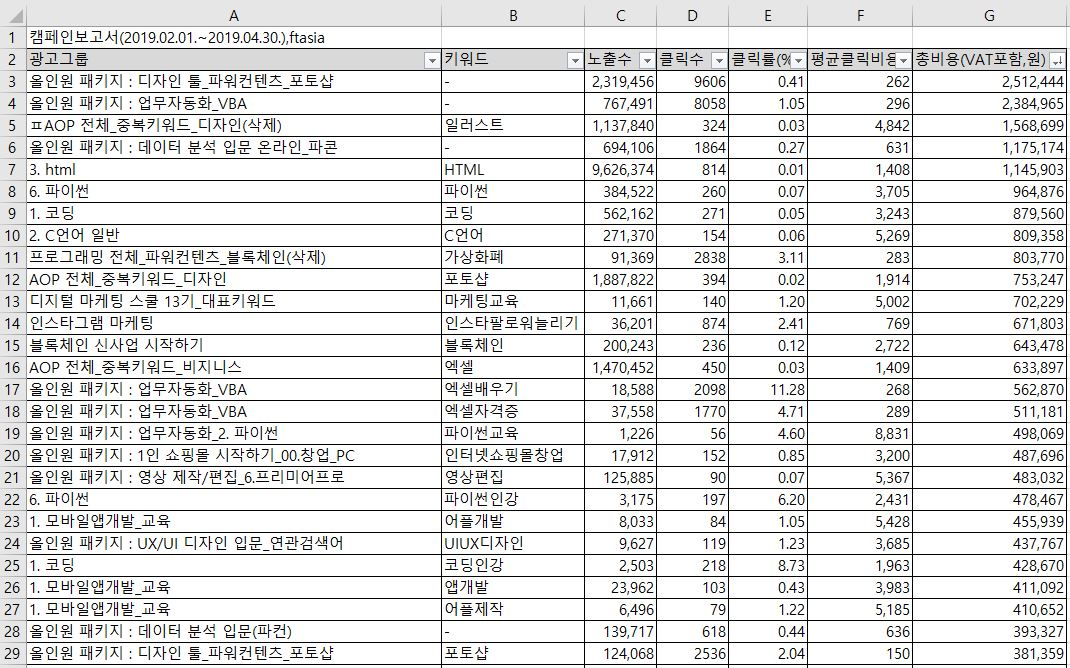

## 데이터의 구성 : 
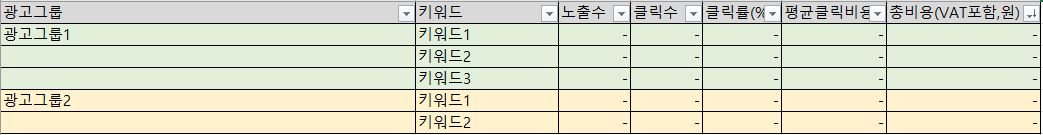

## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터분석

### 1. 데이터 전처리
- 학습목표 : 
 1. read_excel함수를 사용하여 파이썬에 데이터 불러오기 
 2. 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기

In [230]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [231]:
import matplotlib.pyplot as plt

In [232]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

### # read_excel함수를 사용하여 파이썬에 데이터 불러오기
- 파이썬의 디렉토리 경로구분자 : 슬래시(/)
- 운영체제별 디렉토리 경로구분자 
 1. Mac의 경우 : 슬래시(/)
 2. 윈도우의 경우 : 역슬래시(\ or ＼) 

In [ ]:
# window의 경우 경로인식에러 발생
df=pd.read_excel('C:\Users\jungh\Desktop\데이터분석\패스트캠퍼스\네이버보고서.xls')

In [ ]:
# 방법1 : \\
df=pd.read_excel('C:\\Users\\jungh\\Desktop\\데이터분석\\패스트캠퍼스\\네이버보고서.xls')

In [ ]:
# 방법2 : /
df=pd.read_excel('C:/Users/jungh/Desktop/데이터분석/패스트캠퍼스/네이버보고서.xls')

In [ ]:
# 방법3 : r
df=pd.read_excel(r'C:\Users\jungh\Desktop\데이터분석\패스트캠퍼스\네이버보고서.xls')

In [326]:
# Mac : 
df=pd.read_excel('/Users/junghs/네이버보고서.xls')

In [327]:
# head
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174


### # skiprows 함수 사용으로 불필요한 행 제거

In [328]:
# 첫 행 삭제
df=pd.read_excel('/Users/junghs/네이버보고서.xls',skiprows=[0])

In [329]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


### # skiprows 사용 예제

In [330]:
# 원본데이터 가져오기
df=pd.read_excel('/Users/junghs/네이버보고서.xls')

In [331]:
# head
df

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
5,3. html,HTML,9626374,813.60,0.01,1408.44,1145903
6,6. 파이썬,파이썬,384522,260.40,0.07,3705.36,964876
7,1. 코딩,코딩,562162,271.20,0.05,3243.22,879560
8,2. C언어 일반,C언어,271370,153.60,0.06,5269.26,809358
9,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838,3.11,283.22,803770


In [332]:
# 하나의 행 제거 
df=pd.read_excel('/Users/junghs/네이버보고서.xls',skiprows=[1])

In [333]:
# head
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


In [334]:
# 여러 행 제거
df=pd.read_excel('/Users/junghs/네이버보고서.xls',skiprows=[0,2,4])

In [335]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
2,3. html,HTML,9626374,813.60,0.01,1408.44,1145903
3,6. 파이썬,파이썬,384522,260.40,0.07,3705.36,964876
4,1. 코딩,코딩,562162,271.20,0.05,3243.22,879560


### (강의 진행을 위한 실습데이터 불러오기)

In [336]:
df=pd.read_excel('/Users/junghs/네이버보고서.xls',skiprows=[0])
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


### # 결측치 확인

In [337]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [338]:
# 결측치 확인 - 열단위
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [339]:
# 결측치 확인 - 행단위
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1351    0
1352    0
1353    0
1354    0
1355    0
1356    0
1357    0
1358    0
1359    0
1360    0
1361    0
1362    0
1363    0
1364    0
1365    0
1366    0
1367    0
1368    0
1369    0
1370    0
1371    0
1372    0
1373    0
1374    0
1375    0
1376    0
1377    0
1378    0
1379    0
1380    0
Length: 1381, dtype: int64

### # 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함,원)

In [340]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


- 클릭수 : 한 번의 클릭이 총 몇 번 이루어졌는지 나타내는 지표<br>
=> 반올림처리, 일의 자리수로 변경

In [341]:
# 클릭수 열에 round함수 적용
clk=round(df['클릭수'],0)

In [342]:
clk

0      9606.00
1      8058.00
2       324.00
3      1864.00
4       814.00
5       260.00
6       271.00
7       154.00
8      2838.00
9       394.00
10      140.00
11      874.00
12      236.00
13      450.00
14     2098.00
15     1770.00
16       56.00
17      152.00
18       90.00
19      197.00
20       84.00
21      119.00
22      218.00
23      103.00
24       79.00
25      618.00
26     2536.00
27      278.00
28       79.00
29     1535.00
         ...  
1351      0.00
1352      0.00
1353      0.00
1354      0.00
1355      0.00
1356      0.00
1357      0.00
1358      0.00
1359      0.00
1360      0.00
1361      0.00
1362      0.00
1363      0.00
1364      0.00
1365      0.00
1366      0.00
1367      0.00
1368      0.00
1369      0.00
1370      0.00
1371      0.00
1372      0.00
1373      0.00
1374      0.00
1375      0.00
1376      0.00
1377      0.00
1378      0.00
1379      0.00
1380      0.00
Name: 클릭수, Length: 1381, dtype: float64

### # round함수 활용예제
숫자 예시 : 9606.14574
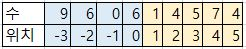

In [343]:
print(round(9606.14574,-3))
print(round(9606.14574,-2))
print(round(9606.14574,-1))
print(round(9606.14574,0))
print(round(9606.14574,1))
print(round(9606.14574,2))
print(round(9606.14574,3))
print(round(9606.14574,4))
print(round(9606.14574,5))

10000.0
9600.0
9610.0
9606.0
9606.1
9606.15
9606.146
9606.1457
9606.14574


In [344]:
# clk변수의 4번째 자료 확인
clk[4]

814.0

In [345]:
# clk변수의 5번째 자료 확인
clk[5]

260.0

In [346]:
# 소수점 제거 = 실수(float) => 정수(int)로 변경
clk.astype(int)

0       9606
1       8058
2        324
3       1864
4        814
5        260
6        271
7        154
8       2838
9        394
10       140
11       874
12       236
13       450
14      2098
15      1770
16        56
17       152
18        90
19       197
20        84
21       119
22       218
23       103
24        79
25       618
26      2536
27       278
28        79
29      1535
        ... 
1351       0
1352       0
1353       0
1354       0
1355       0
1356       0
1357       0
1358       0
1359       0
1360       0
1361       0
1362       0
1363       0
1364       0
1365       0
1366       0
1367       0
1368       0
1369       0
1370       0
1371       0
1372       0
1373       0
1374       0
1375       0
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int64

In [347]:
# 기존 칼럼데이터 대체
df['클릭수']=clk.astype(int)

In [348]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.59,1175174
4,3. html,HTML,9626374,814,0.01,1408.44,1145903


- 클릭률 : CTR = 클릭수 / 노출수 * 100<br>
=> 클릭수가 변경되어 기존 클릭률(%) 열 데이터 변경필요

In [349]:
# 데이터프레임의 열은 서로 수치연산 가능 
df['클릭수']/df['노출수']*100

0       0.41
1       1.05
2       0.03
3       0.27
4       0.01
5       0.07
6       0.05
7       0.06
8       3.11
9       0.02
10      1.20
11      2.41
12      0.12
13      0.03
14     11.29
15      4.71
16      4.57
17      0.85
18      0.07
19      6.20
20      1.05
21      1.24
22      8.71
23      0.43
24      1.22
25      0.44
26      2.04
27      2.60
28      1.83
29      1.10
        ... 
1351    0.00
1352    0.00
1353    0.00
1354    0.00
1355    0.00
1356    0.00
1357    0.00
1358    0.00
1359    0.00
1360    0.00
1361    0.00
1362    0.00
1363    0.00
1364    0.00
1365    0.00
1366    0.00
1367    0.00
1368    0.00
1369    0.00
1370    0.00
1371    0.00
1372    0.00
1373    0.00
1374    0.00
1375    0.00
1376    0.00
1377    0.00
1378    0.00
1379    0.00
1380    0.00
Length: 1381, dtype: float64

In [350]:
df['클릭률(%)']=df['클릭수']/df['노출수']*100

In [351]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.59,1175174
4,3. html,HTML,9626374,814,0.01,1408.44,1145903


In [352]:
# 수치연산 예제1
df['노출수']+df['클릭수']

0       2329062
1        775549
2       1138164
3        695970
4       9627188
5        384782
6        562433
7        271524
8         94207
9       1888216
10        11801
11        37075
12       200479
13      1470902
14        20686
15        39328
16         1282
17        18064
18       125975
19         3372
20         8117
21         9746
22         2721
23        24065
24         6575
25       140335
26       126604
27        10988
28         4403
29       141264
         ...   
1351       7732
1352       7756
1353       7814
1354       7967
1355       8214
1356       8693
1357       8784
1358       8792
1359       8864
1360       8952
1361       9282
1362       9622
1363       9715
1364      10121
1365      10405
1366      10486
1367      10574
1368      10620
1369      12898
1370      15893
1371      16605
1372      16722
1373      17504
1374      18818
1375      23549
1376      24016
1377      32287
1378      32602
1379      60844
1380      61193
Length: 1381, dtype: int

In [353]:
# head

In [354]:
# 수치연산 예제2
df['총비용(VAT포함,원)']/df['클릭률(%)']

0        6066524.37
1        2271580.01
2       55090384.88
3        4376047.88
4      135514629.55
5       14269848.05
6       18245579.66
7       14262044.19
8         258772.59
9       36091275.58
10        584906.60
11        278260.19
12       5459829.03
13      20713669.14
14         49869.53
15        108468.56
16        109041.53
17        574711.23
18       6756275.92
19         77113.34
20        436018.81
21        354149.82
22         49218.39
23        956367.62
24        337670.30
25        889230.88
26        186571.17
27        145092.76
28        205265.75
29        334209.01
           ...     
1351            nan
1352            nan
1353            nan
1354            nan
1355            nan
1356            nan
1357            nan
1358            nan
1359            nan
1360            nan
1361            nan
1362            nan
1363            nan
1364            nan
1365            nan
1366            nan
1367            nan
1368            nan
1369            nan


- 평균클릭비용 : 칼럼명에 원 단위로 명시됨<br>
 => 반올림처리, 일의 자리수로 변경

In [355]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.59,1175174
4,3. html,HTML,9626374,814,0.01,1408.44,1145903


In [356]:
# cpc 변수 생성
cpc=round(df['평균클릭비용(VAT포함,원)'],0)
df['평균클릭비용(VAT포함,원)']=cpc.astype(int)

In [357]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903


### # 판다스를 활용한 데이터 탐색 실습
- 학습목표 : 
 1. 데이터 탐색과정에서 사용되는 함수를 살펴보고 실전 사례를 통해 사용법을 익힌다.

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [3]:
df=pd.read_excel('/Users/junghs/네이버보고서.xls',skiprows=[0])

In [4]:
#head() - 데이터의 첫 부분 출력, default : 첫 5행
#데이터의 구성,칼럼명 등 대략적인 데이터 파악
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [5]:
#head() - 첫 10행
df.head(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
7,2. C언어 일반,C언어,271370,153.6,0.056602,5269.257812,809358
8,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838.0,3.106086,283.217054,803770
9,AOP 전체_중복키워드_디자인,포토샵,1887822,393.6,0.020849,1913.737297,753247


In [6]:
#tail() - 데이터의 끝 부분 출력, default : 끝 5행
df.tail()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.0,0.0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.0,0.0,0
1378,마케팅KPI수립,LTV,32602,0.0,0.0,0.0,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.0,0.0,0
1380,4. 웹의 동작,REST,61193,0.0,0.0,0.0,0


In [7]:
#tail() - 끝 10행
df.tail(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1371,7. 운영체제,가상머신,16605,0.0,0.0,0.0,0
1372,파이낸스 전체,부동산책,16722,0.0,0.0,0.0,0
1373,ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제),VD,17504,0.0,0.0,0.0,0
1374,AOP 전체_중복키워드_디자인,포토샵단축키,18818,0.0,0.0,0.0,0
1375,올인원 패키지 : 업무자동화_3. 엑셀,SUMIF,23549,0.0,0.0,0.0,0
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.0,0.0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.0,0.0,0
1378,마케팅KPI수립,LTV,32602,0.0,0.0,0.0,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.0,0.0,0
1380,4. 웹의 동작,REST,61193,0.0,0.0,0.0,0


In [8]:
#shape - dataframe의 크기(행, 열의 수)
df.shape

(1381, 7)

In [10]:
#describe() - 각 열에 대한 기술통계량
#데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
#지수 표기법(Exponential Notation, 10**n)
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352871,981.631682,3.791958e+04
std,2.964650e+05,387.502772,1.000468,1372.390031,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.007152,64.166667,7.700000e+01
50%,3.805000e+03,3.600000,0.061031,395.976793,2.123000e+03
75%,1.073400e+04,14.400000,0.237026,1302.812500,1.743500e+04
max,9.626374e+06,9606.000000,13.587402,9362.527778,2.512444e+06


In [11]:
#pandas출력 옵션설정 - float형식으로 수치표기  
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로

In [12]:
#describe()
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [13]:
#columns - 칼럼명 반환
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [15]:
#unique() - 열(시리즈)의 고유값
#df['광고그룹']
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [16]:
#len, unique()
#df['광고그룹']
len(df['광고그룹'].unique())

186

In [17]:
#unique()
#df['키워드']
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [19]:
#len, unique()
#df['키워드']
len(df['키워드'].unique())

1112

In [20]:
#value_counts() - 열의 고유값 빈도
#df['광고그룹']
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀             93
AOP 전체_중복키워드_디자인                  57
#000_마케팅 전체_main                  48
ㅍAOP 전체_중복키워드_디자인(삭제)             46
타이포그래피와 편집디자인                     26
리눅스 인프라                           26
1. 전체                             26
올인원 패키지 : 금융공학/퀀_03.금융공학          25
올인원 패키지 : 업무자동화_VBA               25
007.빅데이터                          24
올인원 패키지 : 콘텐츠 마케팅_대표키워드           23
올인원 패키지 : 금융공학/퀀트_01.파이썬기본&자동화    21
AOP 전체_중복키워드_마케팅                  20
올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵         19
ㅍAOP 전체_중복키워드_마케팅(삭제)             18
올인원 패키지 : 업무자동화_2. 파이썬            18
1. 모바일앱개발_교육                      18
8. 시스템 프로그래밍                      17
파이썬을 통한 금융 데이터 수집과 분석 자동화 16기     16
1. 일반_PC                          15
파이낸스 전체                           15
typescript 실전 workshop            14
마케팅 전체                            14
ㅍ1. 전체                            13
올인원 패키지 : 투자_파워콘텐츠                13
포토샵 유치원_일러스트레이터 유치원               13
Python & Django를 활용한 웹 서비스_일반     13
d

In [21]:
#value_counts()
#df['키워드']
df['키워드'].value_counts()

-              8
포토샵            5
구글광고           5
GUI            5
인디자인           4
웹크롤링           4
퍼포먼스마케팅        4
데이터사이언스        4
브랜딩            4
서비스기획          4
포토샵누끼따기        4
마케팅전략          4
마케팅분석          4
검색광고           4
영상제작           4
DJANGO         4
포토샵CS6         3
PYTHON         3
엑셀VBA          3
포토샵강좌          3
포토샵자격증         3
포토샵책           3
빅데이터분석         3
엑셀배우기          3
어도비포토샵         3
블록체인           3
자바스크립트         3
어도비인디자인        3
어도비XD          3
마케팅            3
              ..
엑셀절대참조         1
파이썬강의          1
LOGGING        1
벽화알바           1
스타트업투자         1
딥페이스           1
텐서플로우          1
제어문            1
AFTEREFFECT    1
회사소개서          1
논문             1
콘티             1
AR             1
CONCAT         1
캘리             1
상품페이지          1
커널             1
CDMA           1
C++CLASS       1
엑셀카운트          1
프로그래밍입문        1
변동성            1
손익계산서          1
파일입출력          1
엑셀고급필터         1
엑셀COUNTIF      1
컴퓨터자격증종류       1
기획강의          

In [22]:
#sort_values() - 정렬(default : 오름차순)
#노출수 기준 정렬
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
1058       1008
1059       1009
336        1009
1060       1017
1061       1018
525        1021
1062       1021
427        1023
1063       1025
805        1025
563        1027
866        1027
1064       1029
1065       1029
586        1029
881        1030
1066       1031
785        1033
625        1034
144        1037
1067       1040
1068       1041
915        1042
569        1044
456        1046
         ...   
307      222896
380      224102
344      230365
197      231145
267      237356
602      247898
176      253775
7        271370
53       281599
145      290811
5        384522
271      387261
475      417011
70       478588
6        562162
503      603990
199      642191
94       691814
3        694106
268      742643
1        767491
169      907619
128      913844
48      1021846
2       1137840
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381,

In [23]:
#sort_values(ascending=False) - 내림차순 정렬
#노출수 기준 정렬
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
2       1137840
48      1021846
128      913844
169      907619
1        767491
268      742643
3        694106
94       691814
199      642191
503      603990
6        562162
70       478588
475      417011
271      387261
5        384522
145      290811
53       281599
7        271370
176      253775
602      247898
267      237356
197      231145
344      230365
380      224102
307      222896
         ...   
456        1046
569        1044
915        1042
1068       1041
1067       1040
144        1037
625        1034
785        1033
1066       1031
881        1030
586        1029
1065       1029
1064       1029
866        1027
563        1027
805        1025
1063       1025
427        1023
1062       1021
525        1021
1061       1018
1060       1017
336        1009
1059       1009
1058       1008
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381,

In [24]:
#sort_values - 정렬(default : 오름차순)
#클릭수 기준 정렬
df['클릭수'].sort_values()

1380      0.00
1159      0.00
1160      0.00
1161      0.00
1162      0.00
1163      0.00
1164      0.00
1165      0.00
1158      0.00
1166      0.00
1168      0.00
1169      0.00
1170      0.00
1171      0.00
1172      0.00
1173      0.00
1174      0.00
1167      0.00
1175      0.00
1157      0.00
1155      0.00
1139      0.00
1140      0.00
1141      0.00
1142      0.00
1143      0.00
1144      0.00
1145      0.00
1156      0.00
1146      0.00
         ...  
154     391.20
9       393.60
13      450.00
100     452.40
70      474.00
86      476.40
183     488.40
141     507.60
30      542.40
57      598.80
25      618.00
60      754.80
4       813.60
11      873.60
45      892.80
35      931.20
95     1059.60
43     1191.60
39     1282.80
34     1396.80
29     1534.80
32     1725.60
15     1770.00
3      1863.60
14     2097.60
26     2535.60
83     2798.40
8      2838.00
1      8058.00
0      9606.00
Name: 클릭수, Length: 1381, dtype: float64

In [25]:
#sort_values(ascending=False) 정렬(내림차순)
#클릭수
df['클릭수'].sort_values(ascending=False)

0      9606.00
1      8058.00
8      2838.00
83     2798.40
26     2535.60
14     2097.60
3      1863.60
15     1770.00
32     1725.60
29     1534.80
34     1396.80
39     1282.80
43     1191.60
95     1059.60
35      931.20
45      892.80
11      873.60
4       813.60
60      754.80
25      618.00
57      598.80
30      542.40
141     507.60
183     488.40
86      476.40
70      474.00
100     452.40
13      450.00
9       393.60
154     391.20
         ...  
1146      0.00
1156      0.00
1145      0.00
1144      0.00
1143      0.00
1142      0.00
1141      0.00
1140      0.00
1139      0.00
1155      0.00
1157      0.00
1175      0.00
1167      0.00
1174      0.00
1173      0.00
1172      0.00
1171      0.00
1170      0.00
1169      0.00
1168      0.00
1166      0.00
1158      0.00
1165      0.00
1164      0.00
1163      0.00
1162      0.00
1161      0.00
1160      0.00
1159      0.00
1380      0.00
Name: 클릭수, Length: 1381, dtype: float64

# 시각화를 통한 데이터 탐색 실습

- 학습목표 : 
 1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
 2. 데이터를 가공,처리하여 시각화를 진행한다.

- chapter1 - 03. 시각화 라이브러리 matplotlib  
- 시리즈 시각화

In [29]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [30]:
import matplotlib.pyplot as plt

In [31]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [32]:
#노출수 칼럼 시각화
#데이터프레임 시각화 <-> 시리즈 시각화
#type함수
type(df['노출수'])

pandas.core.series.Series

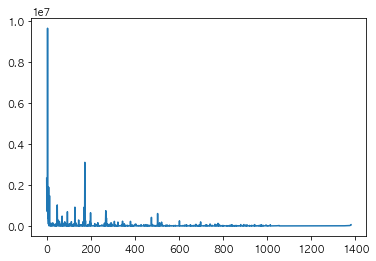

In [33]:
#plotting
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [381]:
#보충예제 - chapter 1 - 03. 시각화 라이브러리 matplotlib 
dict_data={"철수":[1,2,3,4],"영희":[2,3,4,5],"민수":[3,4,5,6],"수진":[4,5,6,7]}
data=DataFrame(dict_data)
#철수 칼럼(데이터프레임의 열 = 시리즈 자료구조) 출력
data['철수']

0    1
1    2
2    3
3    4
Name: 철수, dtype: int64

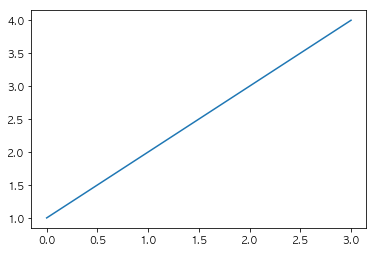

In [382]:
#plotting
#시리즈의 index가 x축, value가 y축
data['철수'].plot()
plt.show()

In [383]:
#시리즈의 index가 x축, value가 y축
df['노출수'].head()

0    2319456
1     767491
2    1137840
3     694106
4    9626374
Name: 노출수, dtype: int64

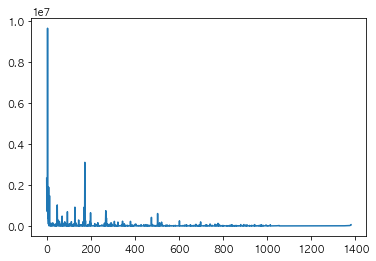

In [384]:
#plotting
df['노출수'].plot()
plt.show()

- 패턴이 명확하게 드러나도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [34]:
#2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
#노출수 칼럼, sort_values()
imp_sort=df['노출수'].sort_values()

In [35]:
#imp_sort 변수 출력
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
1058       1008
1059       1009
336        1009
1060       1017
1061       1018
525        1021
1062       1021
427        1023
1063       1025
805        1025
563        1027
866        1027
1064       1029
1065       1029
586        1029
881        1030
1066       1031
785        1033
625        1034
144        1037
1067       1040
1068       1041
915        1042
569        1044
456        1046
         ...   
307      222896
380      224102
344      230365
197      231145
267      237356
602      247898
176      253775
7        271370
53       281599
145      290811
5        384522
271      387261
475      417011
70       478588
6        562162
503      603990
199      642191
94       691814
3        694106
268      742643
1        767491
169      907619
128      913844
48      1021846
2       1137840
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381,

In [36]:
#reset_index() - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
imp_sort=imp_sort.reset_index()

In [37]:
#imp_sort 변수 출력
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
5,1058,1008
6,1059,1009
7,336,1009
8,1060,1017
9,1061,1018


In [38]:
#drop('삭제할 인덱스명', axis=1) - 삭제(열 기준)
imp_sort.drop('index',axis=1)

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
5,1008
6,1009
7,1009
8,1017
9,1018


In [39]:
#imp_sort 변수 출력
imp_sort
#해당 변수의 index 칼럼 미삭제

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
5,1058,1008
6,1059,1009
7,336,1009
8,1060,1017
9,1061,1018


In [40]:
#inplace=True
imp_sort.drop('index',axis=1,inplace=True)

In [41]:
#imp_sort 변수 출력, 
#기존 변수의 index칼럼 삭제 확인
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
5,1008
6,1009
7,1009
8,1017
9,1018


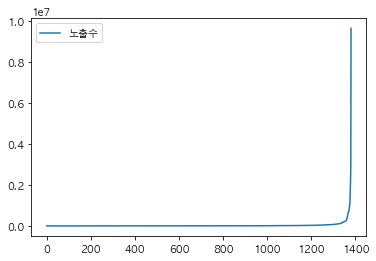

In [42]:
#imp_sort plotting
imp_sort.plot()
plt.show()

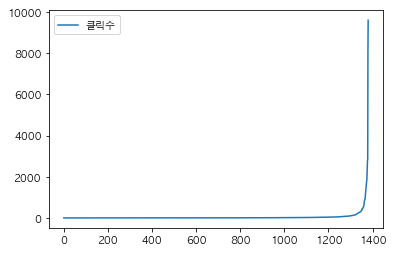

In [48]:
#클릭수칼럼 시각화 
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

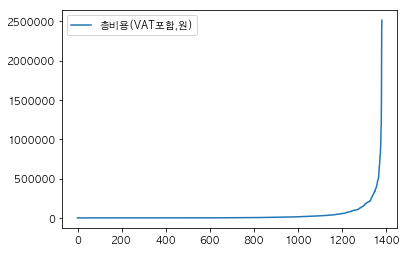

In [49]:
#총비용칼럼 시각화
#위 코드에서 칼럼명만 변경
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

# 데이터 분석
- 학습목표 : 
 1. 파이썬과 판다스를 사용하여 데이터를 처리, 분석할 수 있다.

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [60]:
#노출수 칼럼 imp변수에 할당
imp=df['노출수']

In [61]:
#1. 95백분위수 찾기
#quantile - 분위수 출력(default : 2사분위수(중앙값))
imp.quantile()

3805.0

In [62]:
#median - 중앙값
imp.median()

3805.0

In [63]:
#quantile(0) - 최소값
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [64]:
#quantile(1) - 최대값
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [65]:
#95백분위수 = quantile(0.95)
imp.quantile(0.95)

82858.0

In [66]:
#2. 95백분위수 이상(상위 5%)의 노출수 추출
#series[condition]
imp=imp[imp>=imp.quantile(0.95)]

In [67]:
#imp 출력
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
5       384522
6       562162
7       271370
8        91369
9      1887822
12      200243
13     1470452
18      125885
25      139717
26      124068
29      139729
39       88751
43       94757
48     1021846
53      281599
57       88800
58      213033
61       90942
70      478588
80      152716
82      200487
89      101109
94      691814
103     110768
105     108188
        ...   
176     253775
197     231145
199     642191
201     127788
218     115582
230      96839
232     157060
262     134219
267     237356
268     742643
271     387261
276     100107
292     155516
296      91405
307     222896
323     188124
344     230365
352     104470
380     224102
402      90988
475     417011
503     603990
512     152213
521     185504
602     247898
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

3. 상위 5%에 해당하는 키워드 추출<br>
 -기존 상위 노출수 추출과정
   1. as-is : 데이터프레임의 기본숫자인덱스 
   2. to-be : 데이터프레임의 인덱스를 '키워드'로 재설정

In [68]:
#실습예제 원본
#head()
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


In [69]:
#데이터프레임의 인덱스를 키워드로 변경
#set_index('키워드')
df_index=df.set_index('키워드')

In [70]:
#df_index 
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
파이썬,6. 파이썬,384522,260.40,0.07,3705.36,964876
코딩,1. 코딩,562162,271.20,0.05,3243.22,879560
C언어,2. C언어 일반,271370,153.60,0.06,5269.26,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838.00,3.11,283.22,803770


In [83]:
#df_index에서 imp변수 생성 및 quantile(0.95)
imp=df_index['노출수']

In [84]:
#imp 변수 출력, 노출수 상위 5% 키워드 추출
imp=imp[imp>=imp.quantile(0.95)]

In [85]:
imp

키워드
-            2319456
-             767491
일러스트         1137840
-             694106
HTML         9626374
파이썬           384522
코딩            562162
C언어           271370
가상화폐           91369
포토샵          1887822
블록체인          200243
엑셀           1470452
영상편집          125885
-             139717
포토샵           124068
컴퓨터활용능력       139729
컴퓨터활용능력2급      88751
컴퓨터활용능력1급      94757
포토샵          1021846
리눅스           281599
-              88800
프리미어프로        213033
스프링            90942
폰트            478588
마케팅           152716
스케치           200487
일러스트          101109
포토샵           691814
홍보영상          110768
인디자인          108188
              ...   
경영            253775
컴공            231145
창고매매          642191
프리미어프로        127788
일러스트레이터       115582
일러스트레이터        96839
프리미어          157060
논문            134219
엑셀함수          237356
광고            742643
엑셀            387261
스케치           100107
운영체제          155516
UI             91405
SNS마케팅        222896
소프트웨어         188124
유닉스      

In [86]:
#df_index에서 클릭수 상위 5% 키워드 추출
clk=df_index['클릭수']
clk=clk[clk>=clk.quantile(0.95)]

In [87]:
#clk 변수 출력, 클릭수 상위 5% 키워드 출력
clk

키워드
-           9606.00
-           8058.00
일러스트         324.00
-           1863.60
HTML         813.60
파이썬          260.40
코딩           271.20
C언어          153.60
가상화폐        2838.00
포토샵          393.60
마케팅교육        140.40
인스타팔로워늘리기    873.60
블록체인         236.40
엑셀           450.00
엑셀배우기       2097.60
엑셀자격증       1770.00
인터넷쇼핑몰창업     152.40
파이썬인강        196.80
코딩인강         218.40
-            618.00
포토샵         2535.60
영상편집         278.40
컴퓨터활용능력     1534.80
인스타팔로워       542.40
포토샵배우기      1725.60
이더리움        1396.80
머신러닝         931.20
컴퓨터활용능력2급   1282.80
프로그래밍인강      135.60
컴퓨터활용능력1급   1191.60
              ...  
포토샵          129.60
포토샵자격증      1059.60
엑셀학원         452.40
재테크          300.00
MOS자격증       295.20
컴활1급         379.20
에프터이펙트       242.40
포토샵학원        186.00
글씨체          216.00
마케팅자격증       144.00
컴활1급실기       507.60
주식           297.60
컴활2급실기       391.20
-            234.00
컴활           345.60
컴활2급         310.80
한글폰트         206.40
마블           228.00
바이럴마케팅       261

### # 중점관리키워드 선별
 - 노출수와 클릭수 모두 95백분위수 이상
 
### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [98]:
#df_index에서 imp, clk 변수 생성
imp=df_index['노출수']
clk=df_index['클릭수']

In [99]:
#노출수와 클릭수 모두 상위5%(95백분위수 이상) 추출
result=df_index[(imp>=imp.quantile(0.95))&(clk>=clk.quantile(0.95))]

In [100]:
#result변수 출력
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
파이썬,6. 파이썬,384522,260.40,0.07,3705.36,964876
코딩,1. 코딩,562162,271.20,0.05,3243.22,879560
C언어,2. C언어 일반,271370,153.60,0.06,5269.26,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838.00,3.11,283.22,803770


In [101]:
#index - 중점관리키워드 출력
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### # 저효율키워드 선별

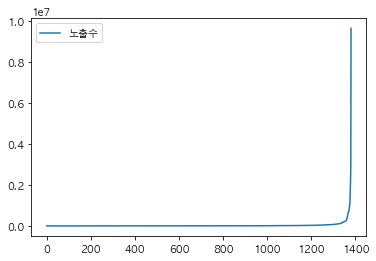

In [102]:
#노출수 선그래프
imp_sort.plot()
plt.show()

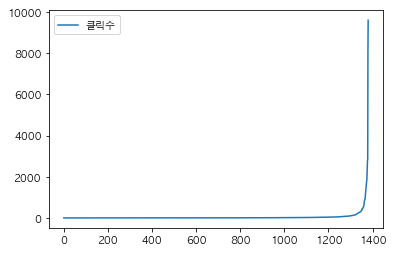

In [103]:
#클릭수 선그래프
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

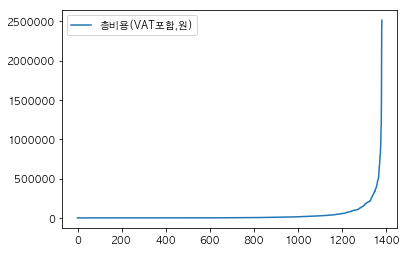

In [104]:
#총비용 선그래프
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 85백분위수 이상
 4. 총비용 95백분위수 미만
 
 ### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [105]:
#df_index로 cost 변수 생성
cost=df_index['총비용(VAT포함,원)']

In [106]:
# 데이터프레임[(조건문)&(조건문)]
result=df_index[(imp<imp.quantile(0.95))&(clk<clk.quantile(0.95))&(cost>=cost.quantile(0.85))&(cost<cost.quantile(0.95))]

In [107]:
#index - 저효율키워드 출력
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

# 광고그룹 분석
- 학습목표 : 
 1. groupby함수 사용실습
 2. 키워드 분석과정에서 진행한 코딩 복습

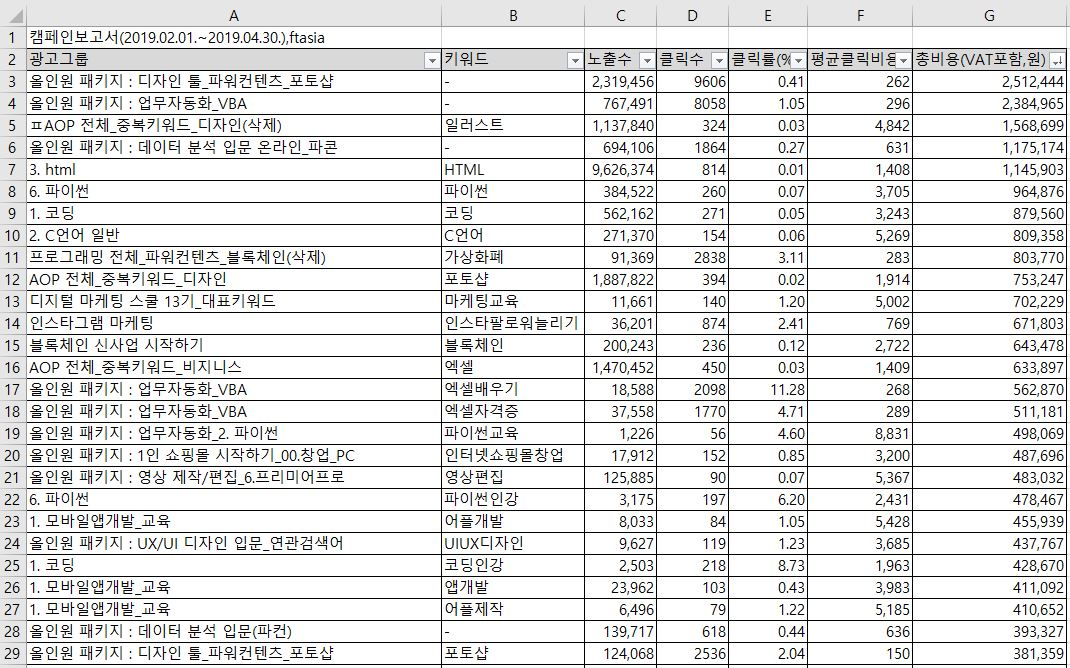

### as-is : 키워드  기준 분석
- 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
- 데이터의 구성을 광고그룹 기준으로 변경해야함
- 광고그룹의 노출수/클릭수/총비용...
- groupby 함수 사용

In [108]:
#groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped=df.groupby('광고그룹')

In [109]:
#해당변수 출력시 객체정보만 출력됨
grouped
#데이터를 살펴보기 위하여는 집계함수 사용해야 함

In [110]:
#count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
002.마케팅 입문,4,4,4,4,4,4
003.파이썬,6,6,6,6,6,6
003.퍼포먼스 마케팅,3,3,3,3,3,3
005.머신러닝,12,12,12,12,12,12


In [111]:
#mean -각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.40,0.18,625.09,7243.96
001.BASIC DESIGN,5738.56,6.80,0.23,298.69,2427.33
001.데이터분석/ 통계,3715.00,20.28,0.89,1021.47,19575.60
002.R,13413.78,8.53,0.11,360.04,4796.00
002.UX/UI,3090.80,4.08,0.09,69.93,550.00
002.마케팅 입문,5093.00,47.10,0.71,578.42,26842.75
003.파이썬,3035.33,3.40,0.11,696.41,3182.67
003.퍼포먼스 마케팅,3484.33,54.80,1.82,2793.17,172725.67
005.머신러닝,2525.00,2.90,0.11,161.47,1514.33


In [112]:
#median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,3.60,0.06,765.97,2458.50
001.BASIC DESIGN,5524.00,2.40,0.04,357.50,1023.00
001.데이터분석/ 통계,1813.00,13.80,0.57,1096.80,13464.00
002.R,5184.00,3.60,0.03,119.17,1287.00
002.UX/UI,2649.00,1.20,0.09,73.33,88.00
002.마케팅 입문,3620.50,17.40,0.56,541.65,8519.50
003.파이썬,2044.00,1.20,0.09,874.65,1353.00
003.퍼포먼스 마케팅,2681.00,70.80,1.65,2648.42,193864.00
005.머신러닝,1426.00,1.20,0.09,64.17,154.00


In [113]:
#std - 그룹 데이터의 표준편차
grouped.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.73,0.31,472.87,15854.71
001.BASIC DESIGN,4182.62,9.14,0.47,176.15,3220.04
001.데이터분석/ 통계,4109.84,18.32,0.82,269.59,19127.40
002.R,19333.63,14.71,0.17,371.70,10077.59
002.UX/UI,1996.65,7.18,0.11,69.11,1005.28
002.마케팅 입문,4591.47,64.93,0.36,213.98,38806.40
003.파이썬,2118.76,3.97,0.11,553.81,4497.07
003.퍼포먼스 마케팅,2738.83,29.82,0.84,1255.79,130480.07
005.머신러닝,1991.91,5.28,0.16,237.03,4620.08


In [114]:
#var - 그룹 데이터의 분산
grouped.var()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1891824593.19,314.41,0.10,223602.50,251371923.49
001.BASIC DESIGN,17494344.53,83.52,0.22,31027.33,10368671.50
001.데이터분석/ 통계,16890757.78,335.50,0.67,72677.81,365857245.60
002.R,373789206.44,216.52,0.03,138163.90,101557901.50
002.UX/UI,3986602.70,51.55,0.01,4775.52,1010592.00
002.마케팅 입문,21081600.67,4215.72,0.13,45785.88,1505936667.58
003.파이썬,4489135.47,15.79,0.01,306701.78,20223681.87
003.퍼포먼스 마케팅,7501209.33,888.96,0.70,1576998.90,17025048762.33
005.머신러닝,3967703.27,27.87,0.03,56183.90,21345133.33


# 광고그룹 기준 데이터 전처리

In [115]:
#그룹데이터의 합계(sum) - 노출수,클릭수,총비용 칼럼
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
002.마케팅 입문,20372,188.40,2.84,2313.69,107371
003.파이썬,18212,20.40,0.64,4178.47,19096
003.퍼포먼스 마케팅,10453,164.40,5.46,8379.50,518177
005.머신러닝,30300,34.80,1.30,1937.60,18172


In [117]:
#df_group 변수 출력
df_group=grouped.sum()
df_group
# 클릭률, 평균클릭비용 칼럼 전처리 
# as-is : 키워드에 대한 클릭률의 총합(sum), 키워드에 대한 평균클릭비용의 총합(sum)
# to-be : 광고그룹에 대한 클릭률, 광고그룹에 대한 평균클릭비용

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
002.마케팅 입문,20372,188.40,2.84,2313.69,107371
003.파이썬,18212,20.40,0.64,4178.47,19096
003.퍼포먼스 마케팅,10453,164.40,5.46,8379.50,518177
005.머신러닝,30300,34.80,1.30,1937.60,18172


In [118]:
#클릭률(ctr) = 클릭수 / 노출수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['클릭률(%)']=df_group['클릭수']/df_group['노출수']

In [119]:
#평균클릭비용(cpc) = 총비용 / 클릭수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['평균클릭비용(VAT포함,원)']=df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [121]:
#클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 결측값이 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,nan,0
fin_camp_business_4,2136,0.00,0.00,nan,0
fin_camp_rfs_9,1928,0.00,0.00,nan,0
다함께 DDD 프로젝트,3689,0.00,0.00,nan,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,nan,0


In [123]:
#fillna - 전달된 값으로 결측값을 대체하는 함수 
#평균클릭비용
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [124]:
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0.00,0
fin_camp_business_4,2136,0.00,0.00,0.00,0
fin_camp_rfs_9,1928,0.00,0.00,0.00,0
다함께 DDD 프로젝트,3689,0.00,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0.00,0


In [125]:
# 평균클릭비용 칼럼 반올림처리(round), 소수점 제거(astype(int)
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [126]:
#head()
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,0.00,862,347710
001.BASIC DESIGN,51647,61.20,0.00,357,21846
001.데이터분석/ 통계,37150,202.80,0.01,965,195756
002.R,120724,76.80,0.00,562,43164
002.UX/UI,15454,20.40,0.00,135,2750


# 데이터 시각화 

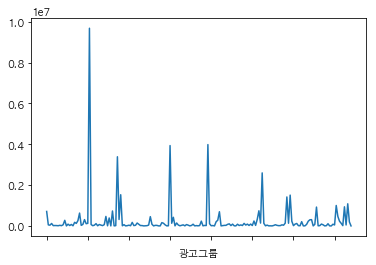

In [127]:
#노출수 칼럼 선그래프
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

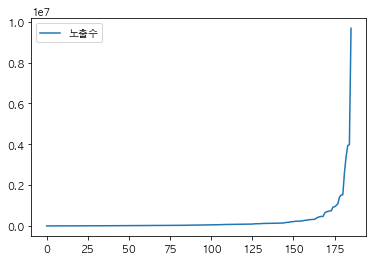

In [132]:
#노출수 칼럼 선그래프
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

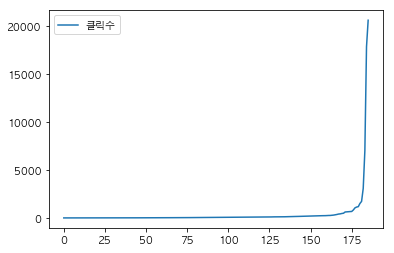

In [133]:
#클릭수 칼럼 선그래프
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

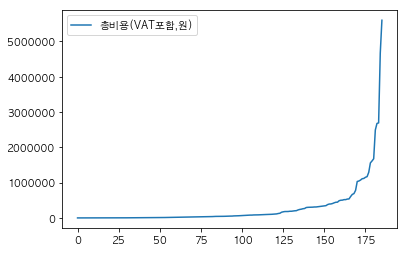

In [134]:
#총비용 칼럼 선그래프
(((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

### # 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
 1. 상위20%(노출수 80백분위수 이상)
 2. 상위10%(클릭수 90백분위수 이상)

In [145]:
#df_group에서 imp, clk 변수 생성
imp=df_group['노출수']
clk=df_group['클릭수']

In [147]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result=df_group[(imp>=imp.quantile(0.8))&(clk>=clk.quantile(0.9))]

In [148]:
#index - 중점관리 광고그룹 출력
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
 1. 노출수 80백분위수 미만
 2. 클릭수 90백분위수 미만
 3. 총비용 60백분위수 이상
 4. 총비용 90백분위수 미만

In [149]:
#df_group에서 cost 변수 생성
cost=df_group['총비용(VAT포함,원)']

In [150]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result=df_group[(imp<imp.quantile(0.8))&(clk<clk.quantile(0.9))&(cost>=cost.quantile(0.6))&(cost<cost.quantile(0.9))]

In [151]:
#index - 저효율 광고그룹 출력
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')